# Amazon stock price prediction 

In this project we are going to use artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing price of a corporation (Amazon).

In [1]:
#Importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#Getting  Amazon data from yahoo finance
df = yf.download("AMZN", start="2012-10-01", end="2021-02-20")

[*********************100%***********************]  1 of 1 completed


In [3]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,3319.000000,3377.000000,3302.709961,3352.149902,3352.149902,3613600
2021-02-08,3358.500000,3365.000000,3304.000000,3322.939941,3322.939941,3257400
2021-02-09,3312.489990,3338.000000,3297.840088,3305.000000,3305.000000,2203500
2021-02-10,3314.000000,3317.949951,3254.000000,3286.580078,3286.580078,3151600
2021-02-11,3292.000000,3292.000000,3248.060059,3262.129883,3262.129883,2295800
2021-02-12,3250.000000,3280.250000,3233.310059,3277.709961,3277.709961,2329300
2021-02-16,3254.050049,3308.300049,3253.590088,3268.949951,3268.949951,2563200
2021-02-17,3263.600098,3320.909912,3259.500000,3308.639893,3308.639893,3297500
2021-02-18,3282.419922,3338.000000,3273.939941,3328.229980,3328.229980,3027400


In [4]:
df.shape

(2110, 6)

Column information:
- Open and Close represent - the starting and final price at which the stock is traded on a particular day
- High and Low - represent the maximum and minimum price of the share for the day
- Volume -  is the number of shares bought or sold in the day

## Visualizing

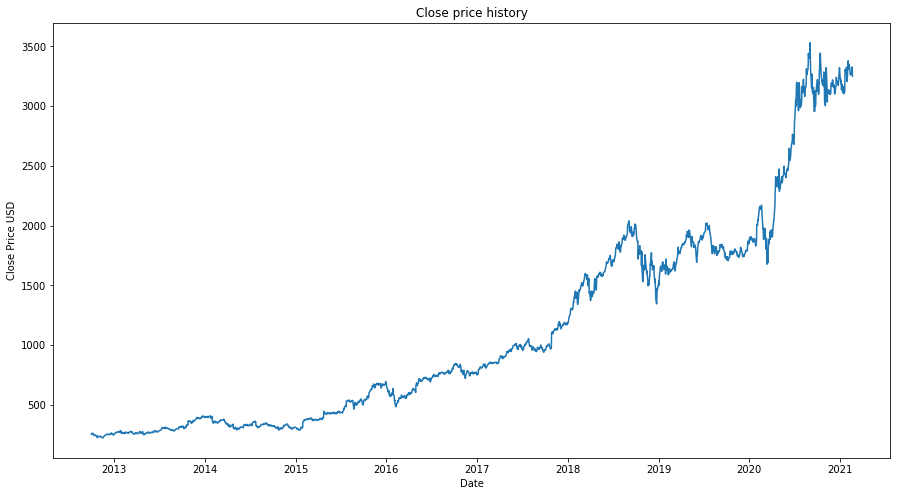

In [5]:
#ploting closing price history
plt.figure(figsize=(15,8))
plt.title("Close price history")
plt.plot(df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price USD")
plt.show()

## Preparing data set

In [11]:
#Creating dataframe with only Close colum
data=df.filter(["Close"])
data

,Close
Date,
2012-10-01,252.009995
2012-10-02,250.600006
2012-10-03,255.919998
2012-10-04,260.470001
2012-10-05,258.510010
...,...
2021-02-12,3277.709961
2021-02-16,3268.949951
2021-02-17,3308.639893


In [12]:
#Converting into numpy array
dataset=data.values
dataset

array([[ 252.00999451],
       [ 250.6000061 ],
       [ 255.91999817],
       ...,
       [3308.63989258],
       [3328.22998047],
       [3249.89990234]])

In [22]:
#lenght of training dataset
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1688

## Scaling data

In [23]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [24]:
scaler=MinMaxScaler()

In [25]:
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00948699],
       [0.00906112],
       [0.01066795],
       ...,
       [0.93270306],
       [0.93862   ],
       [0.9149614 ]])

In [26]:
#Creating training data set
train_data=scaled_data[0:training_data_len,:]
len(train_data)

1688

In [30]:
#Splitting data on train_X and train_y data sets
train_X=[]
train_y=[]

for i in range(60,len(train_data)):
    train_X.append(train_data[i-60:i,0]) #train_X will contain 60 values from index 0 to 59
    train_y.append(train_data[i,0])  # train_y will contain every 61st value which is value we want to predict
    if i<=61:
     print(train_X)
     print(train_y)
     print()

[array([0.00948699, 0.00906112, 0.01066795, 0.01204222, 0.01145023,
       0.01161635, 0.00916985, 0.00736669, 0.00713412, 0.00657233,
       0.00712203, 0.00704955, 0.00812178, 0.0073244 , 0.00585952,
       0.00398085, 0.00414093, 0.00238307, 0.00070072, 0.00532794,
       0.00371204, 0.00348551, 0.00357008, 0.00414697, 0.00512255,
       0.00346134, 0.00203875, 0.00172463, 0.00177296, 0.00181222,
       0.00070978, 0.        , 0.00139843, 0.00275156, 0.00398085,
       0.00526451, 0.00582328, 0.00695289, 0.00688645, 0.00800701,
       0.00926348, 0.00949907, 0.00897957, 0.00963197, 0.01007596,
       0.00989776, 0.00986756, 0.00820635, 0.0090883 , 0.00941148,
       0.00925744, 0.00863524, 0.01004576, 0.01202108, 0.01129317,
       0.01235332, 0.01096999, 0.01148345, 0.0084661 , 0.00836945])]
[0.007424071455995315]

[array([0.00948699, 0.00906112, 0.01066795, 0.01204222, 0.01145023,
       0.01161635, 0.00916985, 0.00736669, 0.00713412, 0.00657233,
       0.00712203, 0.00704955, 0.0

Last two values [0.007424071455995315, 0.00914266412428634] are train_y and the rest are train_X.

In [31]:
#Converting to numpy array
train_X,train_y=np.array(train_X),np.array(train_y)

In [32]:
#Reshape the data (we have 2D data and we need 3D for LSTM)
train_X=np.reshape(train_X,(train_X.shape[0],train_X.shape[1],1))

In [33]:
train_X.shape

(1628, 60, 1)

## Building model

In [34]:
# import tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [36]:
# LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(train_X.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [37]:
# Compile model
model.compile(optimizer="adam",loss="mse")

In [57]:
#Fitting model
model.fit(train_X,train_y,batch_size=5,epochs=20)

Epoch 1/20
326/326 [==============================] - 35s 109ms/step - loss: 1.0289e-04
Epoch 2/20
326/326 [==============================] - 34s 105ms/step - loss: 1.0801e-04
Epoch 3/20
326/326 [==============================] - 38s 117ms/step - loss: 1.0274e-04
Epoch 4/20
326/326 [==============================] - 37s 115ms/step - loss: 9.3673e-05
Epoch 5/20
326/326 [==============================] - 43s 133ms/step - loss: 8.4276e-05
Epoch 6/20
326/326 [==============================] - 40s 121ms/step - loss: 9.0206e-05
Epoch 7/20
326/326 [==============================] - 39s 120ms/step - loss: 7.9054e-05
Epoch 8/20
326/326 [==============================] - 42s 129ms/step - loss: 6.8556e-05
Epoch 9/20
326/326 [==============================] - 51s 157ms/step - loss: 8.6826e-05
Epoch 10/20
326/326 [==============================] - 46s 140ms/step - loss: 8.3048e-05
Epoch 11/20
326/326 [==============================] - 46s 141ms/step - loss: 7.7665e-05
Epoch 12/20
326/326 [=========

In [58]:
#Creating test_data set(from index 1628 to 2110)
test_data=scaled_data[training_data_len-60:,:]

In [59]:
#Creating test_X and test_y
test_X=[]
test_y=dataset[training_data_len:,:] #contain actual values (61st values)

for i in range(60,len(test_data)):
    test_X.append(test_data[i-60:i,0]) #train_X will contain 60 values from index 0 to 59


In [60]:
test_X=np.array(test_X)

In [61]:
test_X=np.reshape(test_X,(test_X.shape[0],test_X.shape[1],1))

In [63]:
#get the models  predicted price
predictions=model.predict(test_X)
#transforming price to unscaled values
predictions=scaler.inverse_transform(predictions)

### Calculating root mean squared error

In [65]:
rmse=np.sqrt(np.mean(predictions-test_y)**2)
rmse

6.008064161544728

Our model have only 6 RMSE. Since the best RMSE is equal to 0  we can say that our model did a good job.

<ipython-input-87-cd5f9eff2a36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"]=predictions


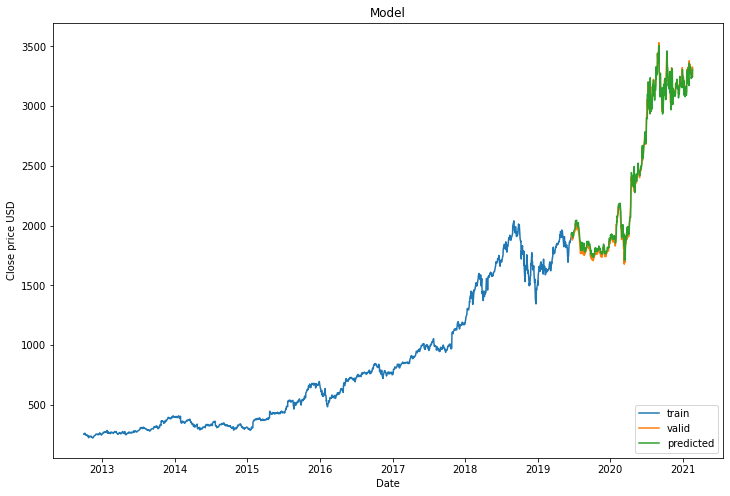

In [87]:
#Ploting
train=data[:training_data_len]
valid=data[training_data_len:]
valid["Predictions"]=predictions

plt.figure(figsize=(12,8))
plt.title("Model")
plt.xlabel("Date")
plt.ylabel("Close price USD")
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["train","valid","predicted"],loc="lower right")
plt.show()

# Results

In [67]:
valid

,Close,Predictions
Date,,
2019-06-19,1908.790039,1925.948975
2019-06-20,1918.189941,1932.585205
2019-06-21,1911.300049,1941.804565
2019-06-24,1913.900024,1934.268311
2019-06-25,1878.270020,1937.053223
...,...,...
2021-02-12,3277.709961,3231.114258
2021-02-16,3268.949951,3257.842773
2021-02-17,3308.639893,3239.580322


### Predicting stock price on 19.2.2021. based on last 60 days closing price

In [75]:
amazon = yf.download("AMZN", start="2012-10-01", end="2021-02-20")

[*********************100%***********************]  1 of 1 completed


In [76]:
#New dataframe
new_data=amazon.filter(["Close"])

#Get last 60 day closing price
last_60=new_data[-60:].values

#Scaling data
scaled_last_60=scaler.transform(last_60)

#Creating test_X
test_X=[]
test_X.append(scaled_last_60)
test_X=np.array(test_X)

#Reshaping
test_X=np.reshape(test_X,(test_X.shape[0],test_X.shape[1],1))

#Predicting price
pred_price=model.predict(test_X)

#unscaling values 
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[3207.1128]]


In [83]:
amazon = yf.download("AMZN", start="2021-02-20", end="2021-02-20")
print(amazon["Close"][:1])

[*********************100%***********************]  1 of 1 completed
Date
2021-02-19    3249.899902
Name: Close, dtype: float64


We can see that our model predict close price 32017.11 USD on 19.02.2021   and  actual  price on 19.02.2021. is 3249.89 USD which is pretty close.